In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
def find_fraction_of_good_Ev( sample=None, good_percentage=15 ):
    Ngood = len(sample[np.abs(sample)<good_percentage])
    fgood = float(Ngood) / len(sample)
    print "%.1f"%(100.*fgood),'% with ratio<',good_percentage,'%'
    return fgood

# 7 Reconstruction of the incoming Eν for the selected events
Aug 30, 2017

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/EvReconstruction/'

# pairs of tracks at close proximity

In [3]:
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
OverlayPairsFV,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')

283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%


In [29]:

cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt no delta phi'               
               ,'Pt & delta phi'
               ,'tight Pt'
               ,'theta_pq & delta phi'
              ]
cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,'$p_t$ imbalance'
             ,r'$\Delta \phi $ \&  $p_{t}$'
             ,r'$p_t<0.15$GeV/c'
             ,r'theta_pq<25'
            ]

reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order=cuts_order)
pureffOverlay

$\mu p$ eff. $\mu p$ pur. CC$0\pi 1 p$ eff.  \
no cut                     100.0%        26.7%            100.0%   
Chi2Proton                  63.1%        70.7%             68.7%   
MatchedFlash                51.6%        78.1%             56.3%   
length                      47.2%        83.5%             52.5%   
non-collinearity            43.1%        87.4%             49.7%   
vertex activity             31.0%        89.1%             44.2%   
delta phi                   20.6%        95.3%             33.7%   
Pt no delta phi             23.3%        92.4%             36.0%   
Pt & delta phi              18.2%        96.3%             30.4%   
tight Pt                     9.5%        96.9%             16.8%   
theta_pq & delta phi        15.7%        96.9%             26.9%   

                     CC$0\pi 1 p$ pur.                 label          1mu-1p  \
no cut                           12.9%                no cut  100.0% (49707)   
Chi2Proton                       37.1%            Chi2Proton   63.1% (31389)   
MatchedFlash                     41.2%          MatchedFlash   51.6% (25634)   
length                           44.8%                length   47.2% (23459)   
non-collinearity                 48.7%      non-collinearity   43.1% (21412)   
vertex activity                  61.5%       vertex activity   31.0% (15391)   
delta phi                        75.2%             delta phi   20.6% (10241)   
Pt no delta phi                  69.0%       Pt no delta phi   23.3% (11582)   
Pt & delta phi                   77.8%        Pt & delta phi    18.2% (9035)   
tight Pt                         82.3%              tight Pt     9.5% (4746)   
theta_pq & delta phi             80.1%  theta_pq & delta phi    15.7% (7821)   

                         other pairs          cosmic       CC 1p 0pi  
no cut                100.0% (41519)  100.0% (95259)  100.0% (23996)  
Chi2Proton              19.3% (8021)     5.2% (5001)   68.7% (16481)  
MatchedFlash            13.2% (5491)     1.8% (1688)   56.3% (13510)  
length                   7.9% (3281)     1.4% (1369)   52.5% (12600)  
non-collinearity         5.8% (2409)      0.7% (673)   49.7% (11926)  
vertex activity          3.7% (1538)      0.4% (346)   44.2% (10616)  
delta phi                 0.9% (382)      0.1% (118)    33.7% (8080)  
Pt no delta phi           1.8% (767)      0.2% (185)    36.0% (8646)  
Pt & delta phi            0.7% (270)       0.1% (79)    30.4% (7304)  
tight Pt                  0.3% (121)       0.0% (29)    16.8% (4029)  
theta_pq & delta phi      0.5% (198)       0.1% (51)    26.9% (6466)

## 7.I Calorimetric reconstruction of the incoming neutrino energy

22.8 % with ratio< 8 %
22.8 % with ratio< 8 %
35.5 % with ratio< 8 %
35.5 % with ratio< 8 %
41.9 % with ratio< 8 %
41.9 % with ratio< 8 %
61.1 % with ratio< 8 %
61.1 % with ratio< 8 %


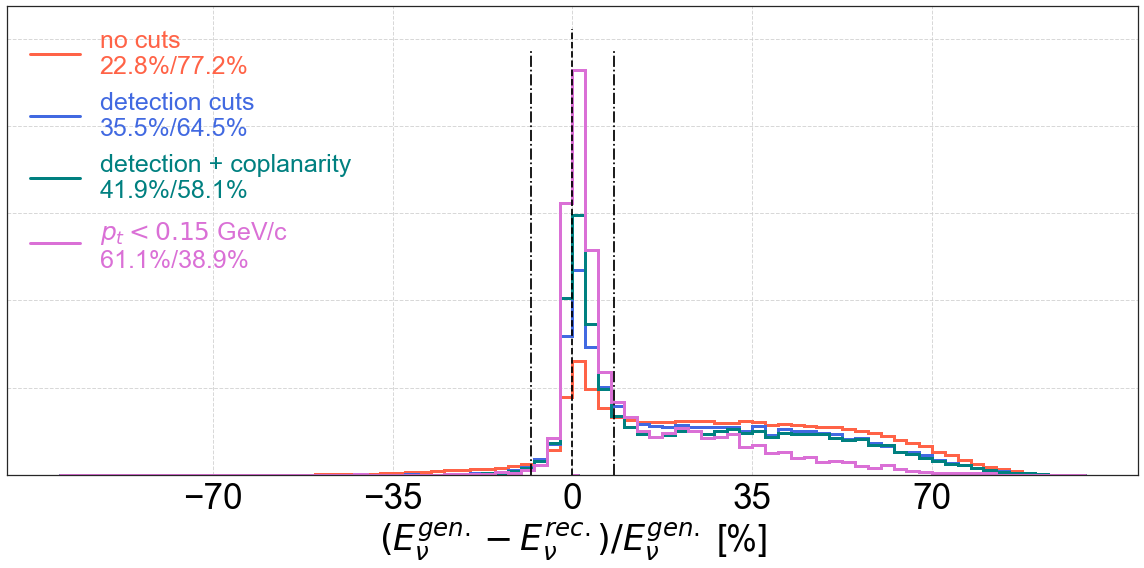

In [9]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,81)
fgood_arr = []
cuts   = ['no cut','vertex activity', 'delta phi' , 'tight Pt' ]                                
cut_labels = ['no cuts','detection cuts','detection + coplanarity', '$p_{t}<0.15$ GeV/c']
cut_colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,cut_labels,cut_colors):
    sample = reducedOverlay[cut_name]['1mu-1p']
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']
    fgood = find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage )
    
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,linewidth=3
             ,label=label+'\n'+'%.1f'%(100.*fgood)+'%'+'/%.1f'%(100.*(1-fgood))+'%')
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35
         ,do_add_grid=True,do_add_legend=False)
# colored legend
leg = plt.legend(fontsize=25,loc='upper left')
for text,color in zip(leg.get_texts(),cut_colors): text.set_color(color)
    
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed.pdf')

## 7.III Reconstructed pt

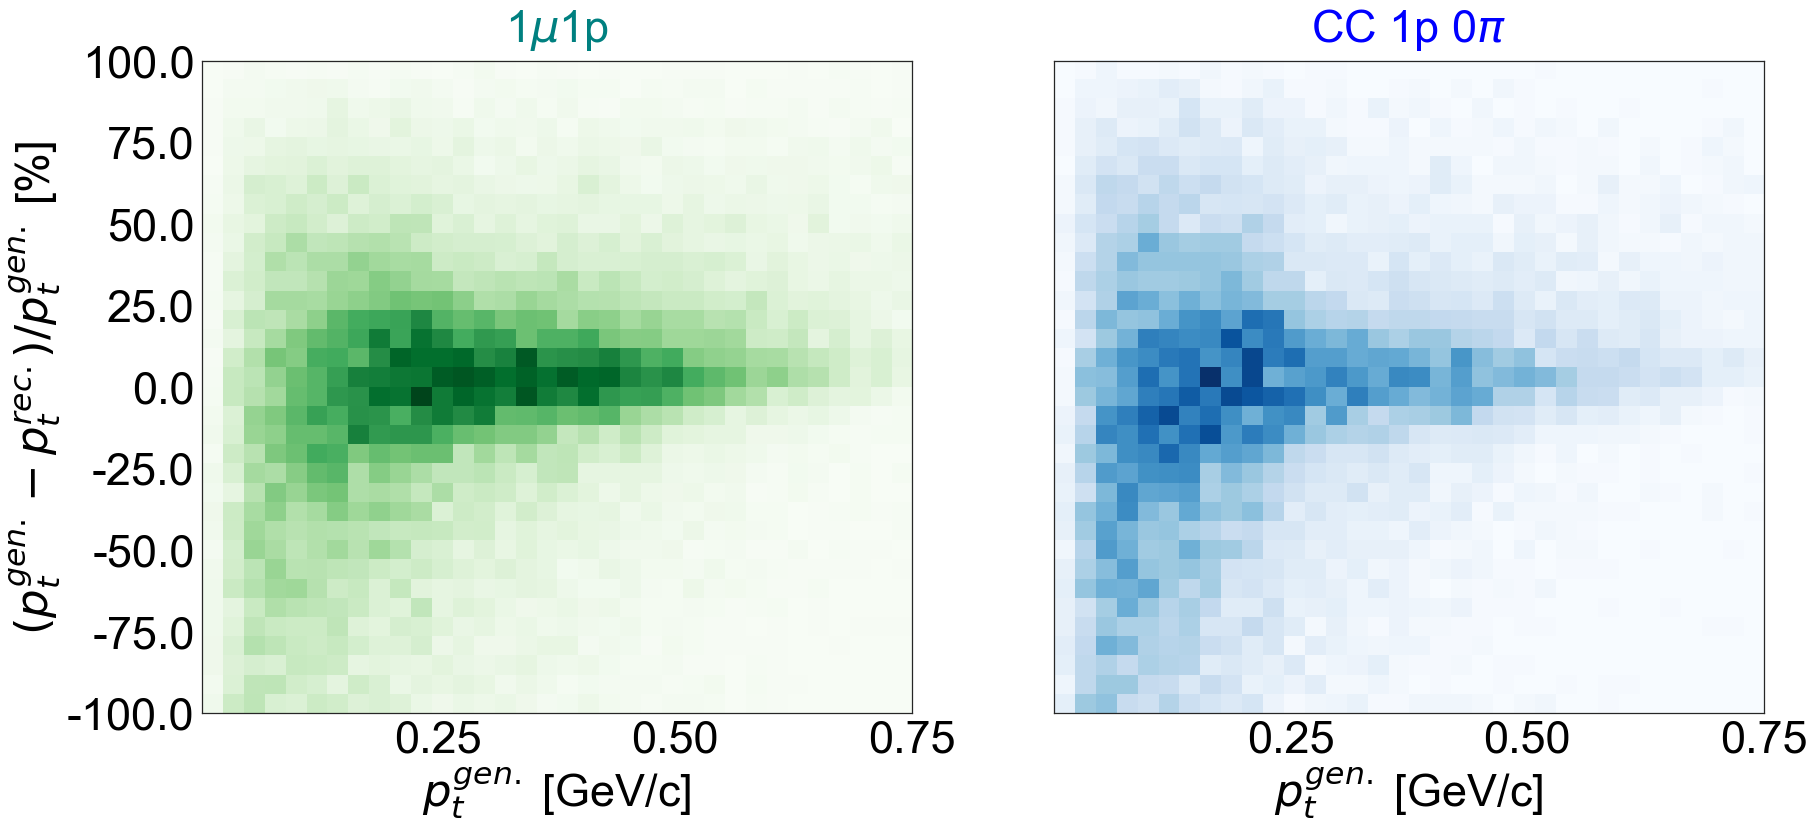

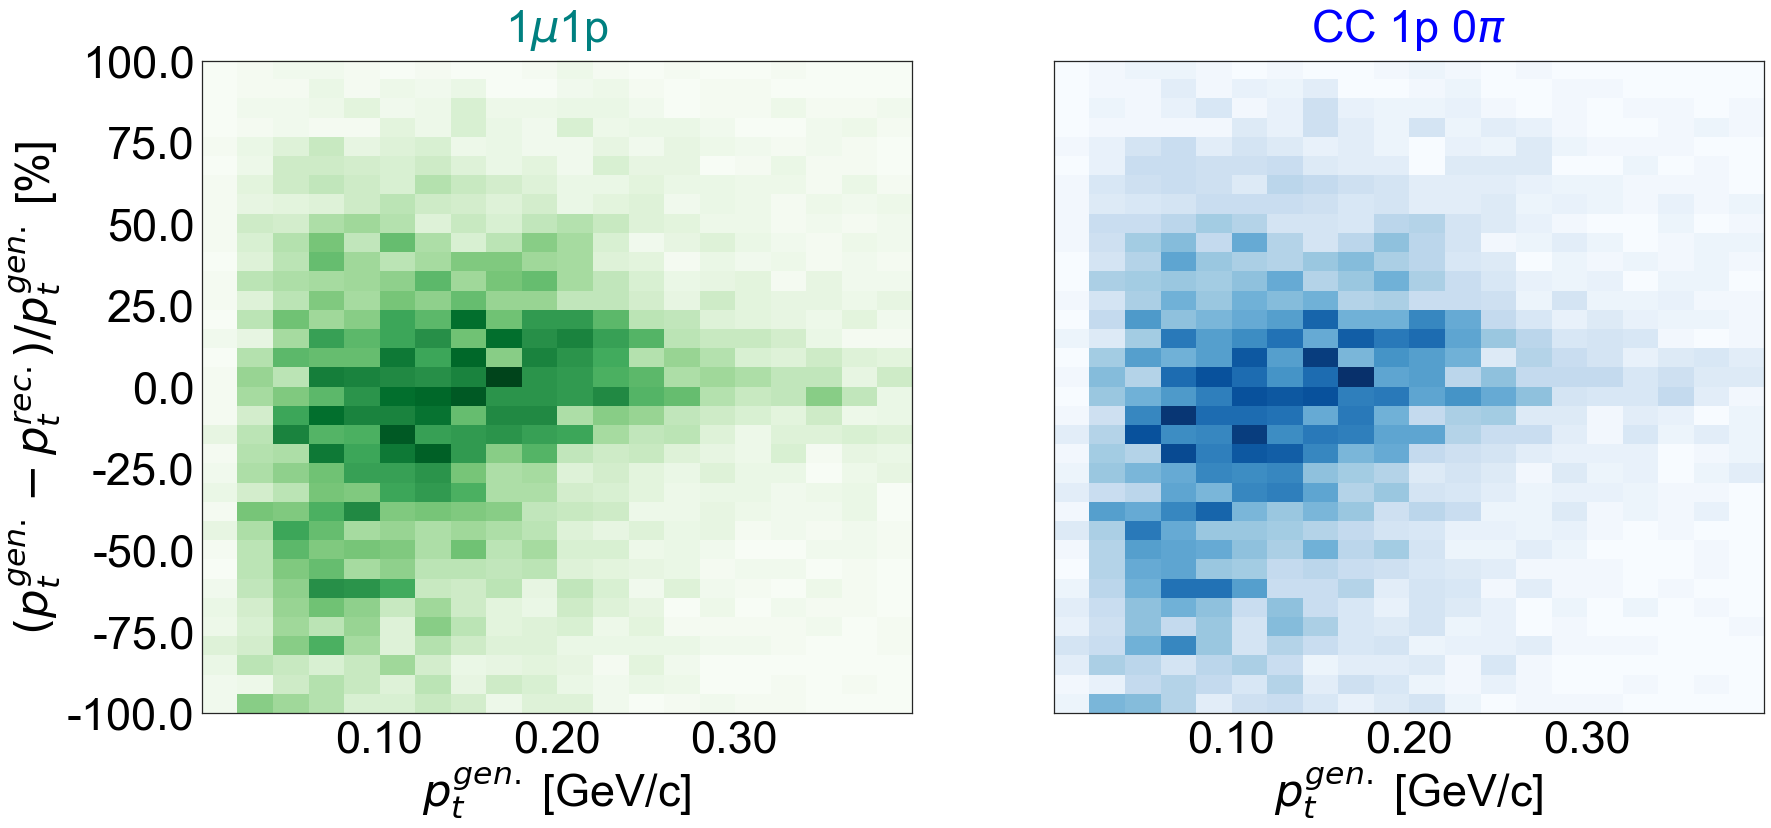

In [11]:
fig = plt.figure(figsize=(28,12))
bins=(np.linspace(0,0.75,35),np.linspace(-100,100,35))
    
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reducedOverlay['no cut'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_Pt'], 
                 100.*(sample['truth_Pt']-sample['reco_Pt'])/sample['truth_Pt'],
                 ax=ax,fontsize=30,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$p_{t}^{gen.}$ [GeV/c]', y_label='$(p_{t}^{gen.}-p_{t}^{rec.})/p_{t}^{gen.}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([0.25,0.5,0.75])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    

fig.savefig(figures_path+'Pt_reconstruction.pdf')

bins=(np.linspace(0,0.4,21),np.linspace(-100,100,35))
fig = plt.figure(figsize=(28,12))
for i,index in enumerate([0,3]):
    pair_type = pair_types[index]
    label = MClabels[index]; cmap = MCcmaps[index]; color = MCcolors[index]
    sample = reducedOverlay['delta phi'][pair_type]    
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)
    plot_2d_hist(sample['truth_Pt'], 
                 100.*(sample['truth_Pt']-sample['reco_Pt'])/sample['truth_Pt'],
                 ax=ax,fontsize=30,ticks_color='black',bins=bins,cmap=cmap,norm='')            
    set_axes(ax,x_label='$p_{t}^{gen.}$ [GeV/c]', y_label='$(p_{t}^{gen.}-p_{t}^{rec.})/p_{t}^{gen.}$ [%]' if i==0 else '',ticks_color='black',fontsize=45)
    ax.xaxis.set_ticks([0.1,0.2,0.3])
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f') if i==0 else ticker.NullFormatter())    
fig.savefig(figures_path+'Pt_reconstruction_after_DeltaPhi_cut.pdf')

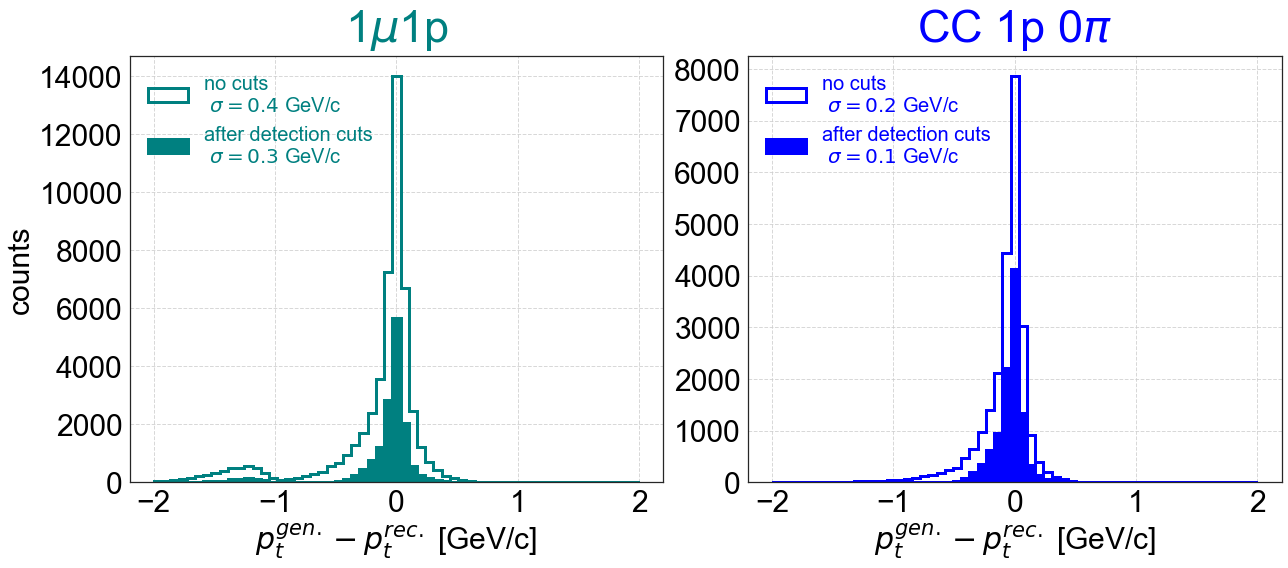

In [12]:
fig=plt.figure(figsize=(18,8))
for i,index in enumerate([0,3]):
    pair_type,label,cmap,color = get_pair_hpars(index)
    ax = fig.add_subplot(1,2,i+1)
    ax.set_title(label,fontsize=45,y=1.02,color=color)

    for cut_name,label in zip(['no cut','vertex activity']
                                  ,['no cuts','after detection cuts']):
        sample = reducedOverlay[cut_name][pair_type]                    
        delta = sample['truth_Pt']-sample['reco_Pt']
        small_sample = sample[np.abs(sample['truth_Pt']-sample['reco_Pt'])<2]
        delta_small_sample = small_sample['truth_Pt']-small_sample['reco_Pt']
        sigma = np.std(delta_small_sample)
        h,bins,_=ax.hist(delta,bins=np.linspace(-2,2,60)
                             ,histtype='step' if cut_name=='no cut' else 'stepfilled'
                             ,color=color
                             ,edgecolor=color
                             ,linewidth=3
                             ,label = label + '\n'+ r' $\sigma=%.1f$'%sigma+' GeV/c')                
        set_axes(ax,r'$p_t^{gen.}-p_t^{rec.}$ [GeV/c]' , 'counts' if i==0 else ''
                 ,fontsize=30,do_add_grid=True
                 ,xticks=[-2,-1,0,1,2]
                )    
        leg = plt.legend(fontsize=20,loc='upper left')
        for text in leg.get_texts():
            text.set_color(color)
ax.grid(linestyle='--',alpha=0.75)
plt.tight_layout()
fig.savefig(figures_path+'Pt_gen_reco.pdf')

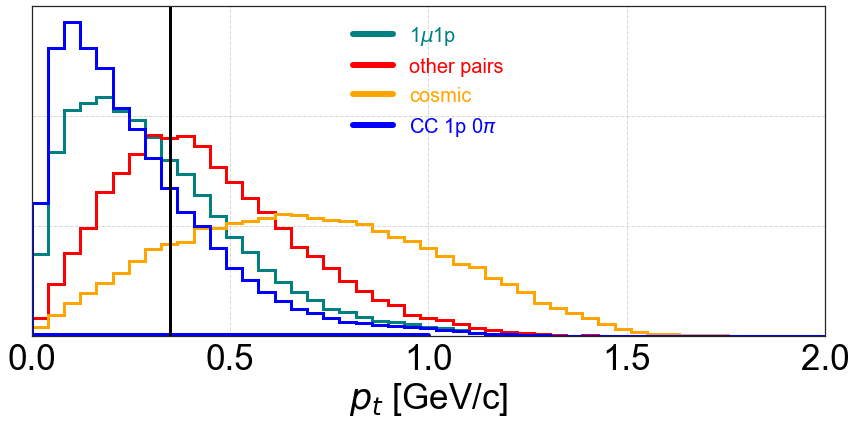

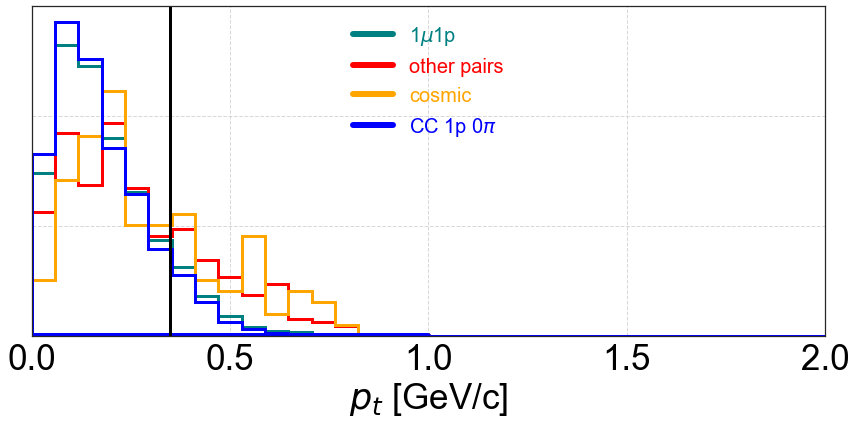

In [13]:
ax=plot_feature_pairs(reduced_samples=reducedOverlay['no cut'],var='reco_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,50)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.plot([0.35,0.35],ax.get_ylim(),'-',color='black',linewidth=3)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.savefig(figures_path+'Pt.pdf')

# after cut 5
ax=plot_feature_pairs(reduced_samples=reducedOverlay['delta phi'],var='reco_Pt',x_label='$p_{t}$ [GeV/c]'
                              ,bins=np.linspace(0,2,35)
                              ,do_add_legend=True,figsize=(12,6),ticks_color='black',fontsize=35,legend_fontsize=20)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
ax.plot([0.35,0.35],ax.get_ylim(),'-',color='black',linewidth=3)
plt.tight_layout()
plt.savefig(figures_path+'Pt_after_DeltaPhi_cut.pdf')

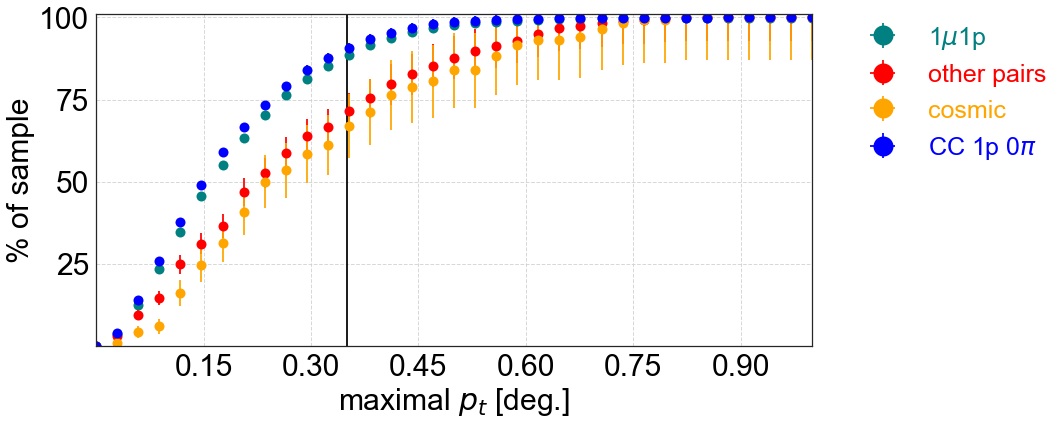

In [18]:
ax,leg=plot_cut_samples(reduced_samples=reducedOverlay['delta phi'],do_add_legend=True,legend_fontsize=25,markers_size=10               
                     ,cut_var ='reco_Pt', cut_type= 'max',ticks_color='black'                 
                     ,x_label = 'maximal $p_{t}$ [deg.]'
                     ,xmin=0, xmax=1. , Nbins=35,fontsize=30,figsize=(12,6));
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
ax.set_xticks([0.15,0.3,0.45,0.6,0.75,0.9])
plt.plot([0.35,0.35],ax.get_ylim(),'-',color='black')
plt.savefig(figures_path+'Pt_cuts.pdf',bbox_extra_artists=(leg,), bbox_inches='tight')

### E$\nu$ in bins of $p_t$ 

In [19]:

bins_labels = ['$p_{t}<0.15$ GeV/c','$0.15<p_{t}<0.25$ GeV/c','$0.25$ GeV/c $<p_{t}$']
bins_colors = ['tomato','royalblue','teal']



43.1 % with ratio< 8 %
23.4 % with ratio< 8 %
13.9 % with ratio< 8 %


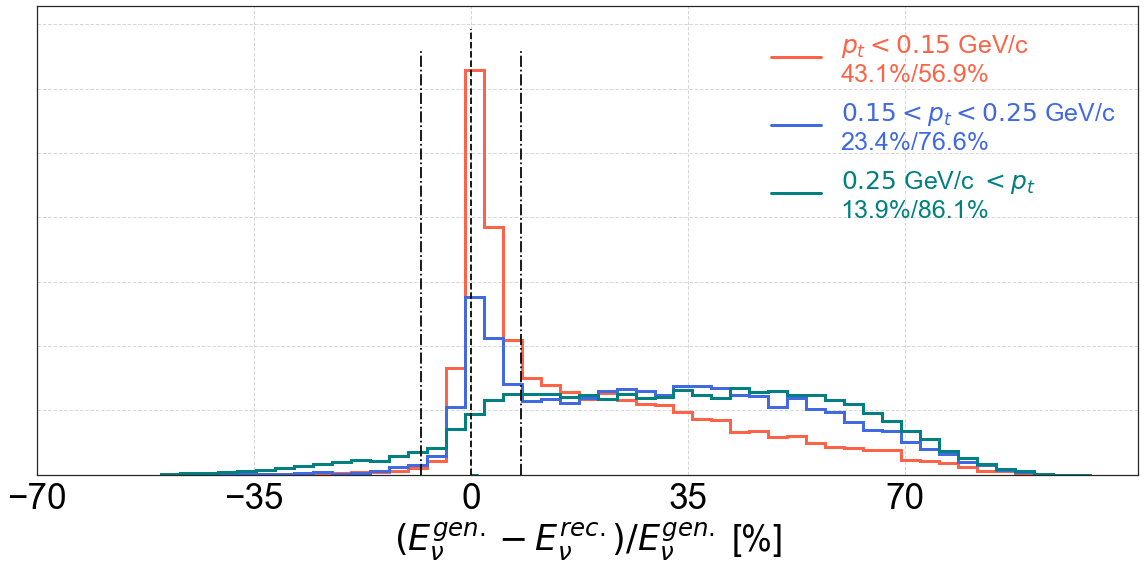

In [20]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reducedOverlay['no cut']['1mu-1p']
cuts_s = [mu_p[mu_p['reco_Pt']<0.15],mu_p[(mu_p['reco_Pt']>0.15)&(mu_p['reco_Pt']<0.25)],mu_p[mu_p['reco_Pt']>0.25]]                                

fgood_arr = []
for sample,label,color in zip(cuts_s,bins_labels,bins_colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))
    text = '%.1f'%fgood_arr[-1]+'%'+'/%.1f'%(100-fgood_arr[-1])+'%'
    plt.plot([0,0],'-',color=color,label=label+' \n'+text,linewidth=3)
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)
plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35,do_add_grid=True)
# colored legend
leg = plt.legend(fontsize=25,loc='upper right')
for text,color in zip(leg.get_texts(),bins_colors): text.set_color(color)

ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt.pdf')

61.1 % with ratio< 8 %
36.2 % with ratio< 8 %
14.1 % with ratio< 8 %


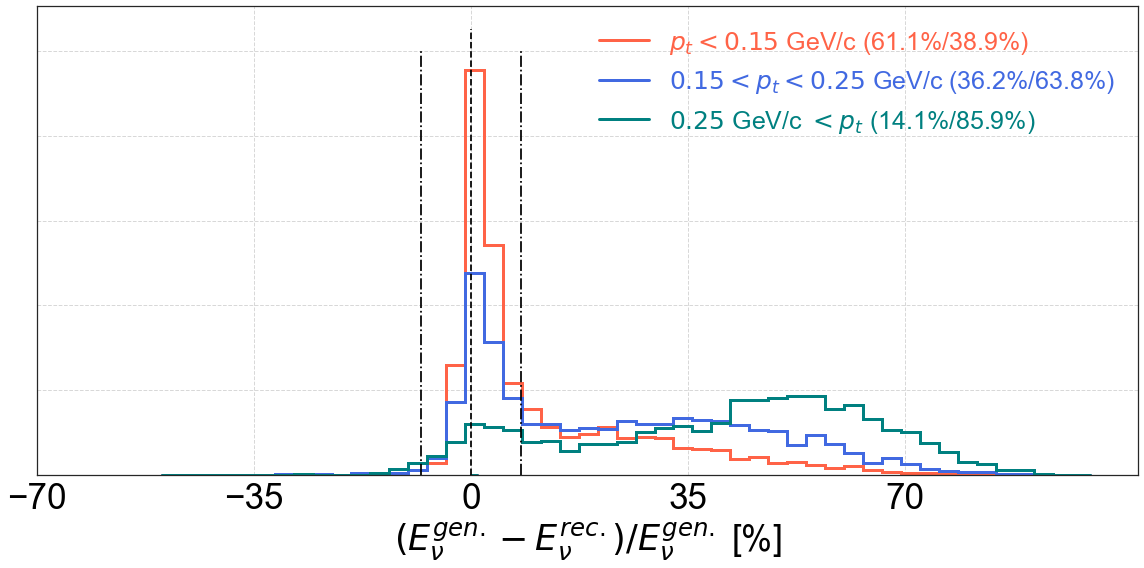

In [21]:
# In Pt bins after cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-50,100,50)
PtBins = [[0,0.1],[0.1,0.2],[0.2,1.0]]
mu_p =  reducedOverlay['delta phi']['1mu-1p']
cuts_s = [mu_p[mu_p['reco_Pt']<0.15],mu_p[(mu_p['reco_Pt']>0.15)&(mu_p['reco_Pt']<0.25)],mu_p[mu_p['reco_Pt']>0.25]]                                

fgood_arr = []
for sample,label,color in zip(cuts_s,bins_labels,bins_colors):
    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev'])/sample['closest_genie_Ev']    
    plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    fgood_arr.append(100.*find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage ))
    text = '%.1f'%fgood_arr[-1]+'%'+'/%.1f'%(100-fgood_arr[-1])+'%'
    plt.plot([0,0],'-',color=color,label=label+' ('+text+')',linewidth=3)
ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)

plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35,do_add_grid=True)
# colored legend
leg = plt.legend(fontsize=25,loc='upper right')
for text,color in zip(leg.get_texts(),bins_colors): text.set_color(color)


ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
plt.savefig(figures_path+'EvReconstructedBinsPt_after_DeltaPhi_cut.pdf')

### 7.IV A tight cut on pt for better reconstructed Eν

In [6]:



# ------------------------------------------------
# April-4 (last edit May 14)
def gen_Noverlay(reducedSamples=None,cut_name=''
                 ,f_POT=1
                 ,N_On=1 # number of pairs in BeamOn before event-selection cuts
                 ,debug=0
                 ):
    # @return the number of events in each subsample of the overlay, POT-normalized
    N = dict()
    for pair_type in pair_types: 
        N[pair_type] = float(len(reducedSamples[cut_name][pair_type]))
        N['eff '+pair_type] = N[pair_type]/len(reducedSamples['no cut'][pair_type])                
    N['MC'] = N['1mu-1p'] + N['other pairs']
    N['Overlay'] = N['cosmic'] + N['MC']
    for pair_type in pair_types: N['pur '+pair_type] = N[pair_type]/N['Overlay']    
    
    N['eff Overlay'] = N['Overlay']/(len(reducedSamples['no cut']['cosmic'])
                                     +len(reducedSamples['no cut']['1mu-1p'])
                                     +len(reducedSamples['no cut']['other pairs']))
                                     
    N['Overlay POT Scaled'] = f_POT*(N['cosmic'] + N['MC'])
    # scale the cosmic in the MC
    N['Cosmic original'] = float(len(reducedSamples['no cut']['cosmic']))
    f_Cosmic = (1./N['Cosmic original'])*(N_On/f_POT - N['MC'])
    N['Cosmic Scaled'] = f_Cosmic*N['cosmic']
    N['Overlay Cosmic Scaled'] = N['MC'] + N['Cosmic Scaled']
    N['eff Overlay Cosmic Scaled'] = (N['Overlay Cosmic Scaled']
                                      /(f_Cosmic*len(reducedSamples['no cut']['cosmic'])
                                        +len(reducedSamples['no cut']['1mu-1p'])
                                        +len(reducedSamples['no cut']['other pairs'])))
    N['Overlay Cosmic & POT Scaled'] = f_POT*N['Overlay Cosmic Scaled']
    if debug:
        print 'Noverlay in',cut_name
        print N
    return N,f_Cosmic
# ------------------------------------------------



In [7]:
cuts_order  = ['no cut'
               ,'Chi2Proton'               
               ,'MatchedFlash'               
               ,'length'
               ,'non-collinearity'               
               ,'vertex activity'               
               ,'delta phi'               
               ,'Pt no delta phi'               
               ,'Pt & delta phi'
               ,'tight Pt'
               ,'theta_pq & delta phi'
              ]
cutlabels = ['preselection'
             ,'$dE/dx$ profile'
             ,'optical filter'
             ,'track lengths'
             ,'collinearity'
             ,'vertex activity'
             ,'coplanarity'
             ,'$p_t$ imbalance'
             ,r'$\Delta \phi $ \&  $p_{t}$'
             ,r'$p_t<0.15$GeV/c'
             ,r'theta_pq<25'
            ]

reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order=cuts_order)
pureffOverlay

$\mu p$ eff. $\mu p$ pur. CC$0\pi 1 p$ eff.  \
no cut                     100.0%        26.7%            100.0%   
Chi2Proton                  63.1%        70.7%             68.7%   
MatchedFlash                51.6%        78.1%             56.3%   
length                      47.2%        83.5%             52.5%   
non-collinearity            43.1%        87.4%             49.7%   
vertex activity             31.0%        89.1%             44.2%   
delta phi                   20.6%        95.3%             33.7%   
Pt no delta phi             23.3%        92.4%             36.0%   
Pt & delta phi              18.2%        96.3%             30.4%   
tight Pt                     9.5%        96.9%             16.8%   
theta_pq & delta phi        15.7%        96.9%             26.9%   

                     CC$0\pi 1 p$ pur.                 label          1mu-1p  \
no cut                           12.9%                no cut  100.0% (49707)   
Chi2Proton                       37.1%            Chi2Proton   63.1% (31389)   
MatchedFlash                     41.2%          MatchedFlash   51.6% (25634)   
length                           44.8%                length   47.2% (23459)   
non-collinearity                 48.7%      non-collinearity   43.1% (21412)   
vertex activity                  61.5%       vertex activity   31.0% (15391)   
delta phi                        75.2%             delta phi   20.6% (10241)   
Pt no delta phi                  69.0%       Pt no delta phi   23.3% (11582)   
Pt & delta phi                   77.8%        Pt & delta phi    18.2% (9035)   
tight Pt                         82.3%              tight Pt     9.5% (4746)   
theta_pq & delta phi             80.1%  theta_pq & delta phi    15.7% (7821)   

                         other pairs          cosmic       CC 1p 0pi  
no cut                100.0% (41519)  100.0% (95259)  100.0% (23996)  
Chi2Proton              19.3% (8021)     5.2% (5001)   68.7% (16481)  
MatchedFlash            13.2% (5491)     1.8% (1688)   56.3% (13510)  
length                   7.9% (3281)     1.4% (1369)   52.5% (12600)  
non-collinearity         5.8% (2409)      0.7% (673)   49.7% (11926)  
vertex activity          3.7% (1538)      0.4% (346)   44.2% (10616)  
delta phi                 0.9% (382)      0.1% (118)    33.7% (8080)  
Pt no delta phi           1.8% (767)      0.2% (185)    36.0% (8646)  
Pt & delta phi            0.7% (270)       0.1% (79)    30.4% (7304)  
tight Pt                  0.3% (121)       0.0% (29)    16.8% (4029)  
theta_pq & delta phi      0.5% (198)       0.1% (51)    26.9% (6466)

In [ ]:
CONTINUE HERE: NEED TO ADD THE FOLLOWING COLUMNS To "numbers":
        'cosmic','other pairs','1mu-1p','CC 1p 0pi','pur 1mu-1p','pur CC 1p 0pi','eff 1mu-1p','eff CC 1p 0pi'
and then run "application of cuts" to update the analysis note
and also try to run "Initial sample of events" from the genie csv file produced in CCQEAna module
finaly, go over the numbers in the abstract and the summary

In [8]:
pureffNumbers.columns

Index([u'$N_{1mu-1p}$', u'$N_{CC 1p 0pi}$', u'$N_{Overlay, cosmic-scaled}$',
       u'$N_{Overlay, cosmic-scaled}^{POT-scaled}$', u'$N_{Overlay}$',
       u'$N_{cosmic, cosmic-scaled}$',
       u'$N_{cosmic, cosmic-scaled}^{POT-scaled}$', u'$N_{cosmic}$',
       u'$N_{other pairs}$', u'${\epsilon}_{1mu-1p}$ [%]',
       u'${\epsilon}_{CC 1p 0pi}$ [%]',
       u'${\epsilon}_{Overlay, cosmic-scaled}$ [%]',
       u'${\epsilon}_{Overlay}$ [%]', u'${\epsilon}_{cosmic}$ [%]',
       u'${\epsilon}_{other pairs}$ [%]', u'${\mathcal{p}}_{1mu-1p}$ [%]',
       u'${\mathcal{p}}_{CC 1p 0pi}$ [%]'],
      dtype='object')

In [10]:
cut_labels = ['$p_t<0.35$ no $\Delta \phi$', '$p_t<0.35$ & $\Delta \phi$', '$p_t<0.15$',r'$\theta_pq < 25$']
# plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)
print " plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)"
print 
print "			\hline"
print "			cut	 					& \\textcolor{orange}{cosmic}		& \\textcolor{red}{other pairs} 		& \\textcolor{teal}{\mup} 		& \\textcolor{blue}{\CCIpOpi}  			& purity \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 	& efficiency \\textcolor{teal}{\mup} (\\textcolor{blue}{\CCIpOpi}) 		\\tabularnewline"
print "\hline \hline"
i_label = 0
for i,row in pureffNumbers.iterrows():
    if "theta_pq" in i or "Pt" in i:
        print cut_labels[i_label]
        print "			"+cut_labels[i_label]+"\
        & \\textcolor{orange}{%d"%row['$N_{cosmic}$']+"}\
        & \\textcolor{red}{%d"%row['$N_{other pairs}$']+"}\
        & \\textcolor{teal}{%d"%row['$N_{1mu-1p}$']+"}\
        & \\textcolor{blue}{%d"%row['$N_{CC 1p 0pi}$']+"}\
        & \\textcolor{teal}{%.1f"%(float(row['${\mathcal{p}}_{1mu-1p}$ [%]']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['${\mathcal{p}}_{CC 1p 0pi}$ [%]']))+"\%"+")}\
        & \\textcolor{teal}{%.1f"%(float(row['${\epsilon}_{1mu-1p}$ [%]']))+"\%"+"}"+"(\\textcolor{blue}{%.1f"%(float(row['${\epsilon}_{CC 1p 0pi}$ [%]']))+"\%"+")}\
        \\tabularnewline"
        print "\hline"
        i_label+=1
print
print

 plug in table tab:FurtherCutOnPt in report (ReconstructionOfEvForTheSelectedEvents.tex)

			\hline
			cut	 					& \textcolor{orange}{cosmic}		& \textcolor{red}{other pairs} 		& \textcolor{teal}{\mup} 		& \textcolor{blue}{\CCIpOpi}  			& purity \textcolor{teal}{\mup} (\textcolor{blue}{\CCIpOpi}) 	& efficiency \textcolor{teal}{\mup} (\textcolor{blue}{\CCIpOpi}) 		\tabularnewline
\hline \hline
$p_t<0.35$ no $\Delta \phi$
			$p_t<0.35$ no $\Delta \phi$        & \textcolor{orange}{185}        & \textcolor{red}{767}        & \textcolor{teal}{11582}        & \textcolor{blue}{8646}        & \textcolor{teal}{92.4\%}(\textcolor{blue}{69.0\%)}        & \textcolor{teal}{23.3\%}(\textcolor{blue}{36.0\%)}        \tabularnewline
\hline
$p_t<0.35$ & $\Delta \phi$
			$p_t<0.35$ & $\Delta \phi$        & \textcolor{orange}{79}        & \textcolor{red}{270}        & \textcolor{teal}{9035}        & \textcolor{blue}{7304}        & \textcolor{teal}{96.3\%}(\textcolor{blue}{77.8\%)}        & \textcolor{teal}

## Following Andy' Comment - reconstruction of $E_\nu$ using information from the lepton only

$ E_\nu = \frac{2M_n^* E_\mu - ( (M_n^*)^2 +m_\mu^2 - M_p^2)}{ 2[(M_n^*) -E_\mu + p_\mu \cos \theta_\mu ]} $
### where
$ M_n^* = M_n - E_B =  M_n - (34\pm 8)$  MeV/c^2

In [15]:
m_mu = 0.1056
M_p = 0.938
M_n = 0.939
E_B = 0.034 # +/- 0.008
M_n_star = M_n - E_B

9.4 % with ratio< 8 %


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


13.5 % with ratio< 8 %
15.4 % with ratio< 8 %
26.4 % with ratio< 8 %


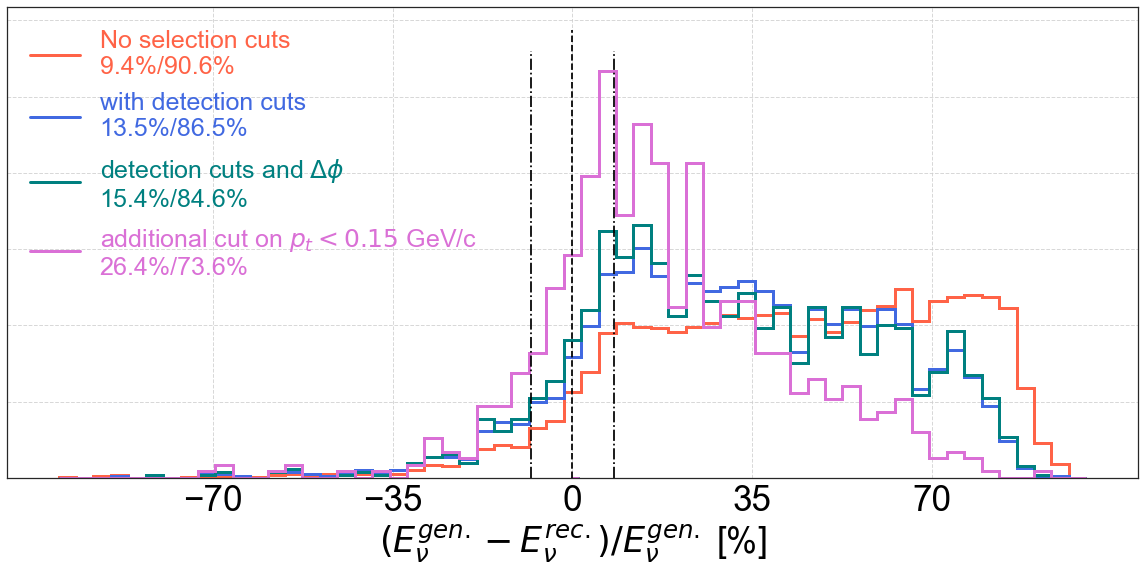

In [16]:
# Ev before and after the cuts
good_percentage = 8 # above 10% we consider bad Ev reconstruction
fig,ax=plt.subplots(figsize=(16,8))
bins = np.linspace(-100,100,60)
fgood_arr = []
cuts   = ['no cut','vertex activity', 'delta phi' , 'tight Pt' ]                                
cut_labels = ['No selection cuts','with detection cuts','detection cuts and $\\Delta \\phi$', 'additional cut on $p_{t}<0.15$ GeV/c']
cut_colors = ['tomato','royalblue','teal','Orchid']
for cut_name,label,color in zip(cuts,cut_labels,cut_colors):
    sample = reduced_MCbnbDATAcosmicSamples[cut_name]['1mu-1p']
        
    sample['reco_Emu'] = np.sqrt( np.square(m_mu) + np.square(sample['reco_Pmu']) )
    numerator =  2*M_n_star*sample['reco_Emu'] - ( np.square(M_n_star) + np.square(m_mu) - np.square(M_p) )
    denominator = 2*( M_n_star - sample['reco_Emu'] + sample['reco_Pmu']*np.cos(sample['reco_Pmu_theta']))
    sample['reco_Ev_from_mu'] = numerator/denominator

    ratio = 100*(sample['closest_genie_Ev'] - sample['reco_Ev_from_mu'])/sample['closest_genie_Ev']
    fgood = find_fraction_of_good_Ev( sample=ratio, good_percentage=good_percentage )
    
    h,bins,_=plt.hist( ratio , bins=bins, histtype='step',linewidth=3,normed=1,color=color);
    plt.plot([0,0],'-',color=color,label=label+'\n'+'%.1f'%(100.*fgood)+'%'+'/%.1f'%(100.*(1-fgood))+'%',linewidth=3)

ax.plot([good_percentage,good_percentage],ax.get_ylim(),'-.'
        ,[-good_percentage,-good_percentage],ax.get_ylim(),'-.'
        ,color='black',alpha=1)

plt.plot([0,0],ax.get_ylim(),'--',color='black')
set_axes(ax,r'$(E^{gen.}_{\nu}-E^{rec.}_{\nu})/E^{gen.}_{\nu}$ [%]'
         ,xticks=[-70,-35,0,35,70],fontsize=35,do_add_grid=True)
# colored legend
leg = plt.legend(fontsize=25,loc='upper left')
for text,color in zip(leg.get_texts(),cut_colors): text.set_color(color)

ax.yaxis.set_major_formatter(ticker.NullFormatter())
plt.tight_layout()
fig.savefig(figures_path+'EvReconstructed_from_muon.pdf')